<div style="background-color:lightgreen;padding:10px;border-radius:5px;">
<center><h1>LOGISTIC REGRESSION</h1></center>
<hr>
<p style="font-size: 18px;"><b>PROBLEM STATEMENT:</b> Predict whether the student will pass the exam or fail</p>
<p><b>About Attributes:</b></p>
<ol>
<li><b>Self_Study_Daily: </b>Indicates how many hours the student studies daily at home</li>
<li><b>Tution_Monthly: </b>Indicates how many hours per month the student is taking private tutor classes</li>
<li><b>TPass_Or_Fail: </b>1 indicates student will pass and 0 indicates student will fail</li>
</ol>
</div>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading and Exploring the dataset

In [2]:
# loading the data using read_csv function from pandas library
data = pd.read_csv("datasets/student_data.csv")
data.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [3]:
data.shape

(1000, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Self_Study_Daily  1000 non-null   int64
 1   Tution_Monthly    1000 non-null   int64
 2   Pass_Or_Fail      1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [5]:
data.describe()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


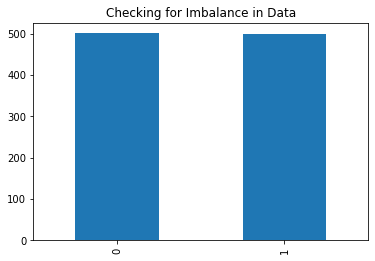

In [6]:
data["Pass_Or_Fail"].value_counts().plot(kind = "bar")
plt.title("Checking for Imbalance in Data")
plt.show()

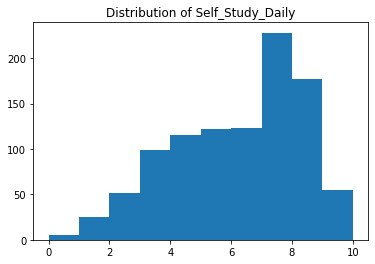

In [7]:
plt.hist(data["Self_Study_Daily"])
plt.title("Distribution of Self_Study_Daily")
plt.show()

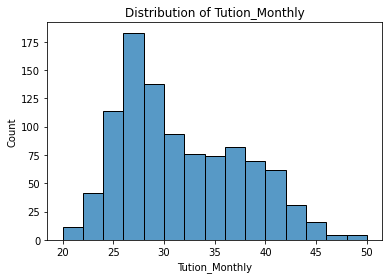

In [8]:
sns.histplot(data["Tution_Monthly"])
plt.title("Distribution of Tution_Monthly")
plt.show()

In [9]:
X = data.iloc[:, :-1]
y = data.loc[:, "Pass_Or_Fail"]

In [10]:
print(f"Independent Data: {X.shape}")
print(f"Dependent Data: {y.shape}")

Independent Data: (1000, 2)
Dependent Data: (1000,)


## Splitting the Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (800, 2), (800,)
Test Data: (200, 2), (200,)


In [12]:
X_train.values[:10], X_test.values[:10]

(array([[ 7, 25],
        [ 7, 26],
        [ 8, 28],
        [ 5, 28],
        [ 7, 25],
        [ 4, 27],
        [ 3, 33],
        [ 7, 26],
        [ 6, 26],
        [ 8, 27]]),
 array([[ 6, 24],
        [ 9, 30],
        [ 7, 24],
        [ 8, 28],
        [ 2, 42],
        [ 5, 21],
        [ 9, 31],
        [ 8, 28],
        [ 5, 34],
        [ 5, 34]]))

## Scaling the Data

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:10], X_test[:10]

(array([[ 0.57147653, -1.04759303],
        [ 0.57147653, -0.88044616],
        [ 1.04134417, -0.54615241],
        [-0.36825877, -0.54615241],
        [ 0.57147653, -1.04759303],
        [-0.83812641, -0.71329928],
        [-1.30799406,  0.28958196],
        [ 0.57147653, -0.88044616],
        [ 0.10160888, -0.88044616],
        [ 1.04134417, -0.71329928]]),
 array([[ 0.10160888, -1.2147399 ],
        [ 1.51121182, -0.21185866],
        [ 0.57147653, -1.2147399 ],
        [ 1.04134417, -0.54615241],
        [-1.77786171,  1.79390382],
        [-0.36825877, -1.71618052],
        [ 1.51121182, -0.04471179],
        [ 1.04134417, -0.54615241],
        [-0.36825877,  0.45672883],
        [-0.36825877,  0.45672883]]))

## Logistic Regression

In [14]:
# initializing logistic regression model
lr_model = LogisticRegression(n_jobs = -1)

In [15]:
# fitting the model on train data
lr_model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

Accuracy: 0.98
Classifiation Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.96      1.00      0.98        95

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



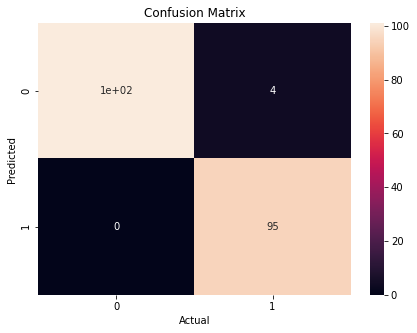

In [16]:
# Generating the metrics to access the quality of our Logistic Regression Model
lr_preds = lr_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, lr_preds)}")

print("=="*50)
print("Classifiation Report")
print(classification_report(y_test, lr_preds))

print("=="*50)
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<center><h1>Hurray, You have successfully learnt Logistic Regression</h1></center>